![insomnia](insomnia.jpg)


# What Attributes Most Impact Sleep Quality? 😴
### Completed by: Nijiko Seino
### Date: 12/7/2023


## Background

In this project, I will be exploring and analyzing data collected by SleepInc's sleep-tracking app in order to identify lifestyle, health, and demographic factors that most strongly correlate with poor sleep quality. 

This will involve the following steps:
1. View the data
2. Explore the data
3. Summarize the data
4. Visualize the data
5. Make models
6. Make and share conclusions 

Based on the results of my analysis, I will make conclusions about which factors most strongly correlate with poor sleep quality and make recommendations for people who would like to get a better night's sleep. 

## The data

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

***Acknowledgments**: Laksika Tharmalingam, Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset* (this is a fictitious dataset)

In [52]:
# Install common packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import and view the data

In [53]:
raw_data = pd.read_csv('sleep_health_data.csv')
raw_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Explore the data
Before performing analyses, I want to get familiar with the dataset. This includes checking for missing values, looking for outliers, and checking out basic statistics. 

In [54]:
# Check for missing values
raw_data.isna().sum()

# output reveals no missing data

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Output reveals no missing data

In [55]:
# View histograms/counts for relevant variables

raw_data['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

Fairly even split between men and women

In [56]:
raw_data['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

Healthcare workers (nurses, doctors) make up the majority of survey participants. Note that this can introduce bias into the analysis as occupations are not evenly represented.
Also, since there are only 2 'Sales Representatives', I am going to combine them into the 'Salesperson' category.

In [57]:
raw_data['Occupation'] = raw_data['Occupation'].replace({'Sales Representative': 'Salesperson'})
raw_data['Occupation'].value_counts()

Nurse                73
Doctor               71
Engineer             63
Lawyer               47
Teacher              40
Accountant           37
Salesperson          34
Software Engineer     4
Scientist             4
Manager               1
Name: Occupation, dtype: int64

(array([32., 48., 26., 55., 25., 78., 14., 37., 26., 33.]),
 array([27. , 30.2, 33.4, 36.6, 39.8, 43. , 46.2, 49.4, 52.6, 55.8, 59. ]),
 <BarContainer object of 10 artists>)

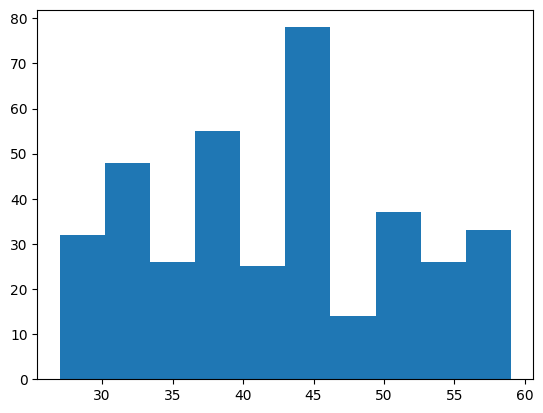

In [58]:
plt.hist(raw_data.Age)

The majority of participants are in their mid-40's

(array([  8.,   9.,  70.,   8.,  69.,  69.,   4., 101.,   0.,  36.]),
 array([ 3000.,  3700.,  4400.,  5100.,  5800.,  6500.,  7200.,  7900.,
         8600.,  9300., 10000.]),
 <BarContainer object of 10 artists>)

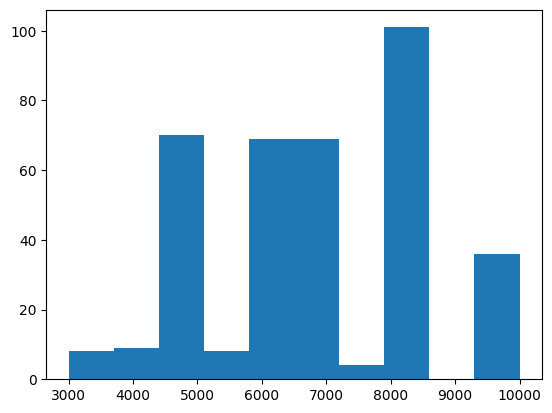

In [59]:
plt.hist(raw_data['Daily Steps'])

In [60]:
raw_data['Sleep Disorder'].value_counts(sort=True)

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [61]:
raw_data['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [62]:
# Combine 'Normal' and 'Normal Weight' categories since they appear to mean the same thing
raw_data['BMI Category'] = raw_data['BMI Category'].replace({'Normal Weight': 'Normal'})
raw_data['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

Based on initial exploration, the dataset appears clean and free of any significant outliers. We will next look at some basic stats and create groupings to examine relationships between variables.

## Summarize the Data

In [63]:
# creating a dataframe of just the numerical variables
data_num = raw_data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]

In [64]:
# View basic stats of all variables in data_num
data_num.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [65]:
# View mean stats by gender
raw_data.groupby('Gender').mean().sort_values(by='Quality of Sleep')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Gender,,,,,,,,
Male,125.095238,37.074074,7.036508,6.968254,59.201058,6.079365,71.052910,6793.650794
Female,251.254054,47.405405,7.229730,7.664865,59.140541,4.675676,69.259459,6840.540541


The biggest relative differences between genders appears to be quality of sleep and stress level, with females having overall higher quality of sleep and lower stress level.

In [66]:
# View mean stats by occupation
raw_data.groupby('Occupation').mean().sort_values(by='Quality of Sleep')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Occupation,,,,,,,,
Scientist,75.500000,33.500000,6.000000,5.000000,41.000000,7.000000,78.500000,5350.000000
Salesperson,205.794118,42.617647,6.373529,5.882353,44.117647,7.058824,72.764706,5823.529412
Software Engineer,46.250000,31.250000,6.750000,6.500000,48.000000,6.000000,75.500000,5800.000000
Doctor,64.056338,32.676056,6.970423,6.647887,55.352113,6.732394,71.521127,6808.450704
Teacher,196.075000,41.725000,6.690000,6.975000,45.625000,4.525000,67.225000,5957.500000
Manager,264.000000,45.000000,6.900000,7.000000,55.000000,5.000000,75.000000,5500.000000
Nurse,295.849315,51.794521,7.063014,7.369863,78.589041,5.547945,72.000000,8057.534247
Accountant,153.054054,39.621622,7.113514,7.891892,58.108108,4.594595,68.864865,6881.081081
Lawyer,153.893617,39.425532,7.410638,7.893617,70.425532,5.063830,69.638298,7661.702128


Scientists have the lowest average quality of sleep, followed by salespersons. At a glance, those who work in sales also appear to have lower sleep durations and higher stress levels.

In [67]:
# View mean stats by BMI category
raw_data.groupby('BMI Category').mean()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
BMI Category,,,,,,,,
Normal,139.648148,38.472222,7.387963,7.638889,57.949074,5.134259,68.976852,6875.462963
Obese,134.900000,38.000000,6.960000,6.400000,55.000000,5.700000,84.300000,3350.000000
Overweight,260.891892,47.885135,6.770270,6.898649,61.236486,5.729730,70.945946,6965.540541


Participants in the 'Normal' weight category had the highest mean quality of sleep, as well as longest average sleep duration, lower stress levels, and lower heart rate

In [68]:
# create a correlation matrix for the numerical variables
data_num.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


Based on the correlation matrix, 'quality of sleep' is most correlated with 'sleep duration' and 'stress level'. It appears moderately correlated with 'heart rate'. 'Sleep Duration' and 'Stress Level' are also highly correlated, and 'Stress Level' is moderately correlated with 'Heart Rate'.

## Create Visualizations

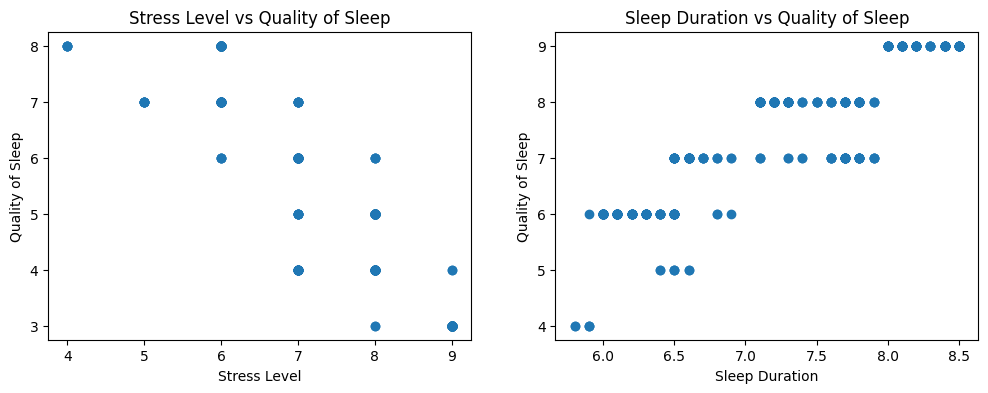

In [69]:
# Visualizing the relationship between the most correlated variables to quality of sleep

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for quality of sleep vs stress level
ax1.scatter(raw_data['Quality of Sleep'], raw_data['Stress Level'])
ax1.set_title('Stress Level vs Quality of Sleep')
ax1.set_xlabel('Stress Level')
ax1.set_ylabel('Quality of Sleep')

# Scatter plot for quality of sleep vs sleep duration
ax2.scatter(raw_data['Sleep Duration'], raw_data['Quality of Sleep'])
ax2.set_title('Sleep Duration vs Quality of Sleep')
ax2.set_xlabel('Sleep Duration')
ax2.set_ylabel('Quality of Sleep')

plt.show()

Quality of sleep decreases as stress level goes up, and increases as sleep duration goes up.

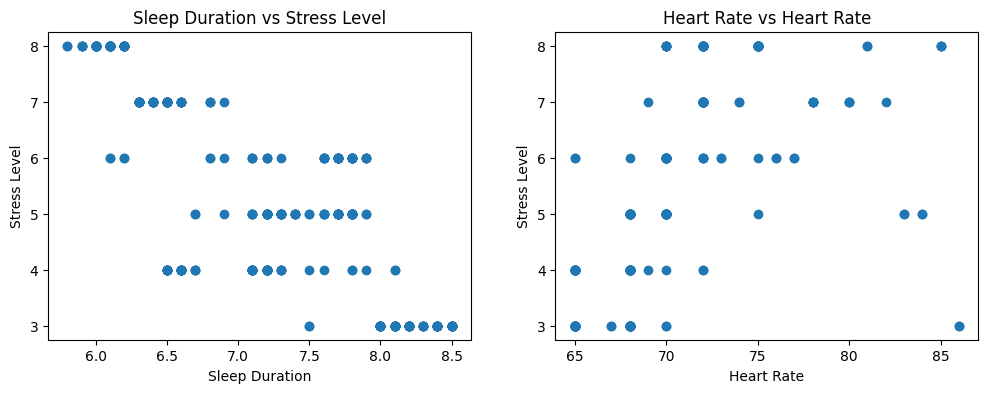

In [70]:
# Visualizing the relationship between stress levels and both sleep duration and heart rate

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for quality of sleep vs stress level
ax1.scatter(raw_data['Sleep Duration'], raw_data['Stress Level'])
ax1.set_title('Sleep Duration vs Stress Level')
ax1.set_xlabel('Sleep Duration')
ax1.set_ylabel('Stress Level')

# Scatter plot for quality of sleep vs sleep duration
ax2.scatter(raw_data['Heart Rate'], raw_data['Stress Level'])
ax2.set_title('Heart Rate vs Heart Rate')
ax2.set_xlabel('Heart Rate')
ax2.set_ylabel('Stress Level')

plt.show()

Stress level decreases as sleep duration increases, and increases as heart rate also increases.

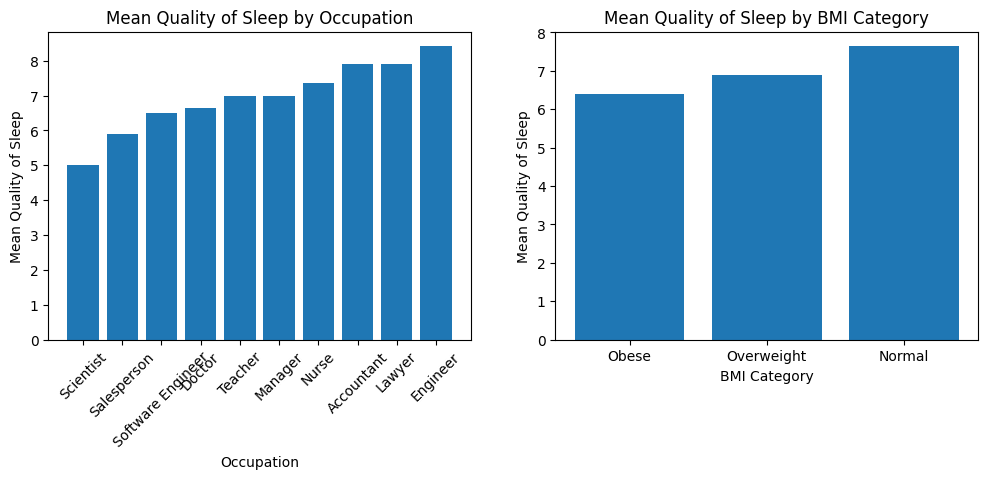

In [71]:
# Visualizing some of the categorical variables and their relation to quality of sleep

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
occupation_quality = raw_data.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
bmi_quality = raw_data.groupby('BMI Category')['Quality of Sleep'].mean().sort_values()

# Bar plot for occupation vs quality of sleep
ax1.bar(occupation_quality.index, occupation_quality.values)
ax1.set_title('Mean Quality of Sleep by Occupation')
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Mean Quality of Sleep')
ax1.set_xticklabels(occupation_quality.index, rotation=45)

# Bar plot for BMI vs quality of sleep
ax2.bar(bmi_quality.index, bmi_quality.values)
ax2.set_title('Mean Quality of Sleep by BMI Category')
ax2.set_xlabel('BMI Category')
ax2.set_ylabel('Mean Quality of Sleep')

plt.show()


## Create Models

In [72]:
#Create a linear regression model to predict quality of sleep
from sklearn.linear_model import LinearRegression

# Define the response variable and predictors
X = data_num[['Sleep Duration', 'Stress Level', 'Heart Rate']]
y = data_num['Quality of Sleep']

model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)


Coefficients: [ 0.69333281 -0.29661064 -0.03681626]


In [73]:
#Create a linear regression model to predict sleep duration
from sklearn.linear_model import LinearRegression

# Define the response variable and predictors
X = data_num[['Stress Level', 'Heart Rate']]
y = data_num['Sleep Duration']

model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)


Coefficients: [-0.37833747  0.00940953]


## Conclusion

The linear regression models provide more details about how much our correlated features impact sleep quality. We have the following conclusions:

1. The attributes most correlated with sleep quality are sleep duration, stress level, and heart rate. More specifically:
    - For each extra hour of sleep (up to 8.5 hours), quality of sleep improves by about 7%
    - For each 1 point increase in stress level (on a scale of 1-10), quality of sleep decreases by about 3%
    - For each 1 point increase in average heart rate, quality of sleep decreases by about .4%
    
2. Clearly sleep duration is important for improving sleep quality. So what are the factors that impact sleep duration?
    - For each 1 point increase in stress level, sleep duration decreases by about .4 hrs (24 minutes)
    - For each 1 point increase in average heart rate sleep duration increases by .009 hrs, or approximately .5 minutes
3. In terms of occupation, scientists and salespersons had the lowest quality of sleep ratings, while engineers had the highest.

## Recommendations

If you have beens struggling with low quality sleep, consider the following:
- **Scientists** had an average sleep quality rating of 5 out of 10, compared to engineers who rated their sleep quality at an 8.4 out of 10. That's a pretty significant jump. Is it time to consider a **new career**?
- **Sleep duration** is the most important factor in improving sleep quality. You can increase your sleep duration by **decreasing stress**.
- Though less impactful, heart rate also plays a role in both sleep quality and duration. Finding ways to **decrease your average resting heart rate** can improve both. 